# anesthetic plot gallery
 This functions as both some examples of plots that can be produced, and a tutorial.
 Any difficulties/issues/requests should be posted as a [GitHub issue](https://github.com/williamjameshandley/anesthetic/issues)

## Download example data
 Download some example data from github (or alternatively use your own chains files)

 This downloads the PLA chains for the planck baseline cosmology,
 and the equivalent nested sampling chains:

In [1]:
import requests
import tarfile

for filename in ["plikHM_TTTEEE_lowl_lowE_lensing.tar.gz","plikHM_TTTEEE_lowl_lowE_lensing_NS.tar.gz"]:
    github_url = "https://github.com/williamjameshandley/cosmo_example/raw/master/"
    url = github_url + filename
    open(filename, 'wb').write(requests.get(url).content)
    tarfile.open(filename).extractall()

## Marginalised posterior plotting
 Import anesthetic and load the MCMC samples:

In [2]:
from anesthetic import MCMCSamples
mcmc_root = 'plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing'
mcmc = MCMCSamples.read(mcmc_root)

We have plotting tools for 1D plots ...

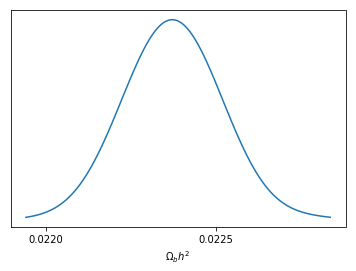

In [3]:
fig, axes = mcmc.plot_1d('omegabh2') ;

... multiple 1D plots ...

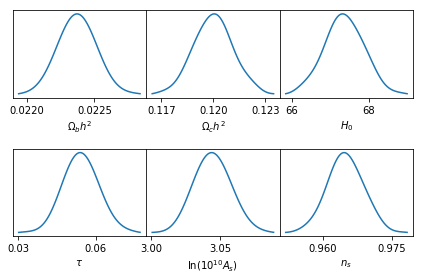

In [4]:
fig, axes = mcmc.plot_1d(['omegabh2','omegach2','H0','tau','logA','ns']);
fig.tight_layout()

... triangle plots ...

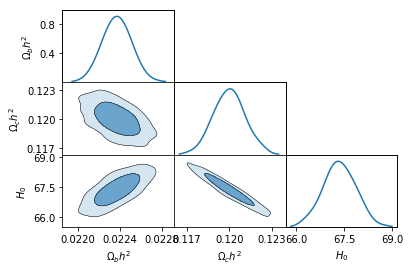

In [5]:
mcmc.plot_2d(['omegabh2','omegach2','H0'], types=['kde']);

... triangle plots (with the equivalent scatter plot filling up the left hand side) ...

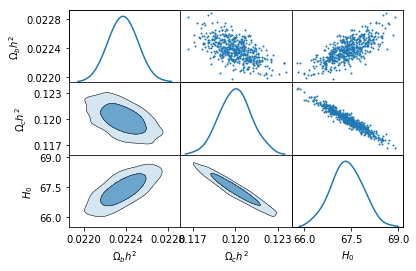

In [6]:
mcmc.plot_2d(['omegabh2','omegach2','H0']);

... and rectangle plots.

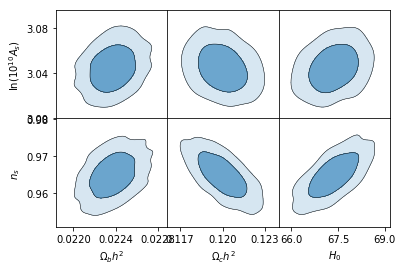

In [7]:
mcmc.plot_2d([['omegabh2','omegach2','H0'], ['logA', 'ns']]);

Rectangle plots are pretty flexible with what they can do:

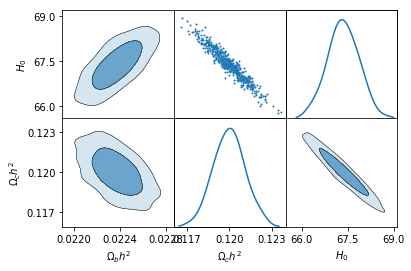

In [8]:
mcmc.plot_2d([['omegabh2','omegach2','H0'], ['H0','omegach2']]);

## Defining new parameters

 You can see that samples are stored as a pandas array

In [9]:
print(mcmc[:6])

   omegabh2  omegach2     theta       tau      logA        ns  calPlanck  \
0  0.022236  0.119022  1.040860  0.057732  3.044784  0.972823   0.999421   
1  0.022212  0.119042  1.040930  0.060019  3.050158  0.971052   0.999462   
2  0.022188  0.119034  1.040894  0.060375  3.050733  0.971215   0.999462   
3  0.022139  0.119490  1.041048  0.061047  3.053969  0.971959   1.000137   
4  0.022064  0.120595  1.040885  0.057995  3.048751  0.968957   0.999233   
5  0.022057  0.120610  1.040870  0.058543  3.049231  0.968699   0.999166   

    acib217        xi    asz143  ...  f2000_217  chi2_lensing  chi2_simall  \
0  45.26123  0.220558  7.089804  ...   105.0097      9.080994     396.7567   
1  33.66526  0.663860  6.944407  ...   106.2465      8.902029     397.5068   
2  38.38740  0.630513  6.452556  ...   106.7611      8.909747     397.6345   
3  46.48444  0.216055  5.573888  ...   106.4796      9.093967     397.8919   
4  46.08949  0.406260  3.696362  ...   106.3372      9.498806     397.0563   

We can define new parameters with relative ease.
 For example, the default cosmoMC setup does not include omegab, only omegabh2:

In [10]:
'omegab' in mcmc

False

However, this is pretty trivial to recompute:

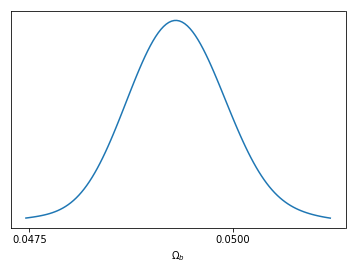

In [11]:
h = mcmc['H0']/100
mcmc['omegab'] = mcmc['omegabh2']/h**2
mcmc.tex['omegab'] = '$\Omega_b$'
mcmc.plot_1d('omegab');

## Nested sampling plotting
 Anethestic really comes to the fore for nested sampling. We can do all of
 the above, and more with the power that NS chains provide

In [12]:
from anesthetic import NestedSamples
nested_root = 'plikHM_TTTEEE_lowl_lowE_lensing_NS/NS_plikHM_TTTEEE_lowl_lowE_lensing'
nested = NestedSamples.read(nested_root)

We can infer the evidence, KL divergence and Bayesian model dimensionality. For that, we generate 1000 weight samples, to get an accurate sampling error in these quantities:

In [13]:
ns_output = nested.ns_output(1000)
print(ns_output[:6])

           logZ          D          d         u
0 -12325.197481  39.082915  16.181842  0.470635
1 -12325.118925  39.169046  15.758072  0.606858
2 -12325.242373  39.231947  16.891907  0.288068
3 -12325.195664  39.033950  16.927790  0.153458
4 -12325.156627  39.125546  17.081935  0.049377
5 -12325.151697  39.088938  17.081590  0.223007


The evidence, KL divergence and Bayesian model dimensionality, with their corresponding errors, are:

In [31]:
print('log(Z)                  = %s  +/- %s' % (ns_output.logZ.mean(), ns_output.logZ.std()))
print('KL                      = %s  +/- %s' % (ns_output.D.mean(), ns_output.D.std()))
print('Ndim                    = %s  +/- %s' % (ns_output.d.mean(), ns_output.d.std()))

log(Z)                  = -12325.2233051  +/- 0.194746315409
KL                      = 39.1728704373  +/- 0.191340405657
Ndim                    = 16.7276258252  +/- 0.414058882563


This is a set of MCMC samples that may be plotted as usual:

In [ ]:
from anesthetic import make_1d_axes
fig, axes = make_1d_axes(ns_output.params, ncols=3)
ns_output.plot_1d(axes);

We can also inspect the correlation between these inferences:

In [ ]:
ns_output.plot_2d(['logZ','D']);

Here is a comparison of the base and NS output

In [ ]:
h = nested['H0']/100
nested['omegab'] = nested['omegabh2']/h**2
nested.tex['omegab'] = '$\Omega_b$'

fig, axes = mcmc.plot_2d(['sigma8','omegab'])
nested.plot_2d(axes=axes);

With nested samples, we can plot the prior (or any temperature), by
 passing beta=0

In [ ]:
from anesthetic import get_legend_proxy

fig, axes = nested.plot_2d(['ns','tau'], beta=0)
nested.plot_2d(axes=axes)
proxy = get_legend_proxy(fig)
fig.legend(proxy, ['prior', 'posterior'])

We can also set up an interactive plot, which allows us to replay a nested
 sampling run after the fact.

In [ ]:
nested.gui()